<a href="https://colab.research.google.com/github/abarankab/tinkoff_notebooks/blob/master/language_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x57902000 @  0x7f42439842a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [0]:
import torch
from torchvision import models, transforms
import numpy as np
from matplotlib import pyplot
%matplotlib inline
from PIL import Image, ImageFilter, ImageChops
import numpy as np
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [0]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import time

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

import copy
import cv2

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
!apt-get install unzip

E: Package 'python-software-properties' has no installation candidate
Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p my_drive
!google-drive-ocamlfuse my_drive -o "nonempty"

In [0]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [0]:
!wget https://github.com/fluentpython/example-code/raw/master/attic/sequences/war-and-peace.txt
!mv ./war-and-peace.txt ./data.txt

--2018-12-08 18:00:07--  https://github.com/fluentpython/example-code/raw/master/attic/sequences/war-and-peace.txt
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fluentpython/example-code/master/attic/sequences/war-and-peace.txt [following]
--2018-12-08 18:00:08--  https://raw.githubusercontent.com/fluentpython/example-code/master/attic/sequences/war-and-peace.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3291641 (3.1M) [text/plain]
Saving to: ‘war-and-peace.txt’

war-and-peace.txt   100%[===================>]   3.14M  --.-KB/s    in 0.1s    

2018-12-08 18:00:09 (28.2 MB/s

In [0]:
file = open('data.txt', 'r')
raw_data = file.read()
print(raw_data[:100])

﻿The Project Gutenberg EBook of War and Peace, by Leo Tolstoy

This eBook is for the use of anyone a


In [0]:
from_alpha = {}
to_alpha = {}

for char in raw_data:
  if not from_alpha.get(char):
    from_alpha[char] = len(from_alpha)
    to_alpha[len(to_alpha)] = char
    print("Encoded {} as {}".format(char, str(from_alpha[char])))
    
raw_data = [from_alpha[char] for char in raw_data]
print(raw_data[:1000])

Encoded ﻿ as 0
Encoded T as 1
Encoded h as 2
Encoded e as 3
Encoded   as 4
Encoded P as 5
Encoded r as 6
Encoded o as 7
Encoded j as 8
Encoded c as 9
Encoded t as 10
Encoded G as 11
Encoded u as 12
Encoded n as 13
Encoded b as 14
Encoded g as 15
Encoded E as 16
Encoded B as 17
Encoded k as 18
Encoded f as 19
Encoded W as 20
Encoded a as 21
Encoded d as 22
Encoded , as 23
Encoded y as 24
Encoded L as 25
Encoded l as 26
Encoded s as 27
Encoded 
 as 28
Encoded i as 29
Encoded w as 30
Encoded m as 31
Encoded v as 32
Encoded . as 33
Encoded Y as 34
Encoded p as 35
Encoded - as 36
Encoded : as 37
Encoded A as 38
Encoded M as 39
Encoded D as 40
Encoded J as 41
Encoded 1 as 42
Encoded 0 as 43
Encoded 2 as 44
Encoded 9 as 45
Encoded [ as 46
Encoded # as 47
Encoded 6 as 48
Encoded ] as 49
Encoded U as 50
Encoded 5 as 51
Encoded 3 as 52
Encoded * as 53
Encoded S as 54
Encoded R as 55
Encoded O as 56
Encoded F as 57
Encoded H as 58
Encoded I as 59
Encoded C as 60
Encoded N as 61
Encoded K as 62
En

In [0]:
chunk_size = 70
hidden_size = 300
num_layers = 1
ntoken = len(from_alpha)
ninp = hidden_size
batch_size = 64

In [0]:
data = [raw_data[i:i+chunk_size] for i in range(0, len(raw_data), chunk_size)][:-1]
data = [data[i:i+batch_size] for i in range(0, len(data), batch_size)][:-1]
                                                
for chunk in data[0][:3]:
  print(len(chunk), chunk)

70 [0, 1, 2, 3, 4, 5, 6, 7, 8, 3, 9, 10, 4, 11, 12, 10, 3, 13, 14, 3, 6, 15, 4, 16, 17, 7, 7, 18, 4, 7, 19, 4, 20, 21, 6, 4, 21, 13, 22, 4, 5, 3, 21, 9, 3, 23, 4, 14, 24, 4, 25, 3, 7, 4, 1, 7, 26, 27, 10, 7, 24, 28, 28, 1, 2, 29, 27, 4, 3, 17]
70 [7, 7, 18, 4, 29, 27, 4, 19, 7, 6, 4, 10, 2, 3, 4, 12, 27, 3, 4, 7, 19, 4, 21, 13, 24, 7, 13, 3, 4, 21, 13, 24, 30, 2, 3, 6, 3, 4, 21, 10, 4, 13, 7, 4, 9, 7, 27, 10, 4, 21, 13, 22, 4, 30, 29, 10, 2, 4, 21, 26, 31, 7, 27, 10, 28, 13, 7, 4, 6, 3]
70 [27, 10, 6, 29, 9, 10, 29, 7, 13, 27, 4, 30, 2, 21, 10, 27, 7, 3, 32, 3, 6, 33, 4, 4, 34, 7, 12, 4, 31, 21, 24, 4, 9, 7, 35, 24, 4, 29, 10, 23, 4, 15, 29, 32, 3, 4, 29, 10, 4, 21, 30, 21, 24, 4, 7, 6, 4, 6, 3, 36, 12, 27, 3, 4, 29, 10, 28, 12, 13, 22]


In [0]:
data = torch.Tensor(data).float().type(torch.LongTensor).to(device)
print(data.shape)
data = data.transpose(1, 2)
print(data.shape)

torch.Size([720, 64, 70])
torch.Size([720, 70, 64])


In [0]:
class LM(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Embedding(ntoken, ninp)
    self.rnn = nn.RNN(input_size=ninp, hidden_size=hidden_size)
    self.decoder = nn.Linear(hidden_size, ntoken)
    self.norm = nn.LayerNorm(ntoken)
    self.init_weights()
    
    
  def forward(self, input, hidden):
    emb = self.encoder(input)
    output, hidden = self.rnn(emb, hidden)
    decoded = self.decoder(output.view(output.size(0) * output.size(1), output.size(2)))
    decoded = self.norm(decoded)
    return decoded.view(output.size(0), output.size(1), decoded.size(1)), hidden
  
  
  def init_hidden(self, batch_size):
    weight = next(self.parameters())
    return weight.new_zeros(1, batch_size, hidden_size)
  
  def init_weights(self):
    initrange = 0.1
    self.encoder.weight.data.uniform_(-initrange, initrange)
    self.decoder.bias.data.zero_()
    self.decoder.weight.data.uniform_(-initrange, initrange)
  
  
model = LM().train().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [0]:
def train(debug=False):
  first = True
  model.train()
  total_loss = .0
  start = time.time()
  hidden = model.init_hidden(batch_size)
  history = []
  
  for i, batch in enumerate(data):
    optimizer.zero_grad()
    
    hidden.detach_()
    output, hidden = model(batch, hidden)
    
    loss = criterion(output.contiguous().view(-1, ntoken), batch.contiguous().view(-1))
    loss.backward()
    total_loss += loss.item()
    history.append(loss.item())
    
    optimizer.step()
    
    if debug and i % 100 == 0:
      print(total_loss / 100)
      print(time.time() - start, 's')
      total_loss = 0
      start = time.time()
      
  return history

In [0]:
!ls ./my_drive/

 aishutin-subm-9.h5	        Screencastify
 brainstorm.odt		       'SIS P.zip'
 cnn_part1.ipynb	        traffic_signs_hakaton
'Colab Notebooks'	        vgg.h5
 convolutional_networks.ipynb  'Европа.18 века. Музыка.7z'
 cooking		       'Консультация по сочинениям.odt'
 data			       'Копия aishutin-subm-9.h5'
 gamenode.odt		       'Мещанин STAGE_1_5 действия.docx'
 good2.jpg		       'Мещанин STAGE_1_5 действия.docx.odt'
 good.jpg		       'Мещанин STAGE_1_5 действия.odt'
 hackaton31aug		       'Новый документ.odt'
 hackEducationCity	       'Новый документ.odt (186fd346)'
 LM1			       'ПЗ 2019.odt'
'Map.io API.odt'	       'Прикрутить frame requests.odt'


In [0]:
model = torch.load('my_drive/LM1/model.pt')

0.002982373237609863
0.031273841857910156 s
0.01244683716504369
1.9045765399932861 s
0.0005397929932223633
1.7322139739990234 s
0.0005962274302146398
1.7228155136108398 s
0.00044345391608658247
1.7253530025482178 s
0.0002668677346082404
1.72403883934021 s
0.00019595154721173457
1.7300059795379639 s
0.0002618234877445502
1.726574420928955 s


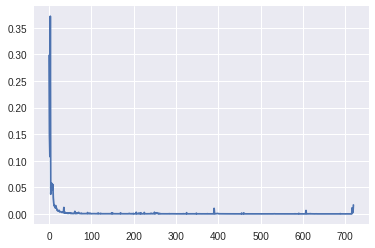

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type LM. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


0.00021037651225924492
0.017345666885375977 s
0.0003024727735464694
1.735746145248413 s
0.00011362054079654627
1.736034870147705 s
0.00013125612516887486
1.7408075332641602 s
0.00010333421676477883
1.7351584434509277 s
9.079445553652476e-05
1.7272841930389404 s
6.965905129618477e-05
1.7391455173492432 s
0.00011691734067426296
1.7399797439575195 s
9.183403104543685e-05
0.017306804656982422 s
0.0001156891202845145
1.734057903289795 s
5.6281751894857735e-05
1.7366104125976562 s
6.655535489699104e-05
1.7354686260223389 s
4.951178700139281e-05
1.7339341640472412 s
5.430178727692692e-05
1.7392075061798096 s
3.8040013168938455e-05
1.7320139408111572 s
7.031026489130454e-05
1.7376911640167236 s
6.095697171986103e-05
0.016994953155517578 s
6.184017845953349e-05
1.7315149307250977 s
3.3780645044316773e-05
1.73472261428833 s
4.229659634802374e-05
1.7370293140411377 s
2.893925346143078e-05
1.7372665405273438 s
3.7668550939997656e-05
1.734055757522583 s
2.355306487515918e-05
1.731400728225708 s
4.5

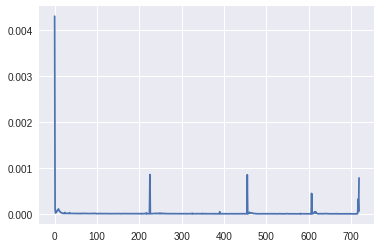

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

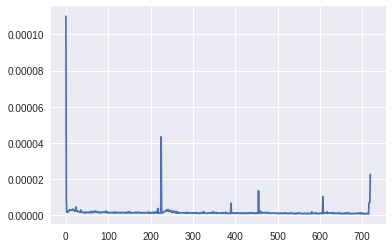

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

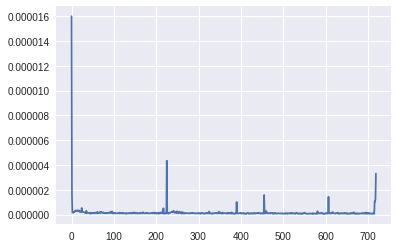

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

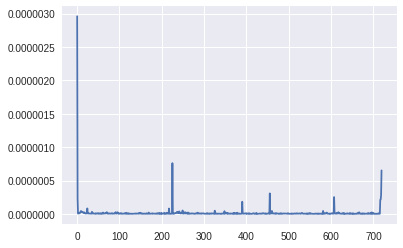

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

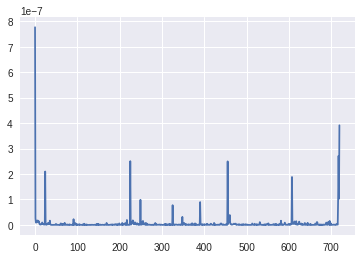

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

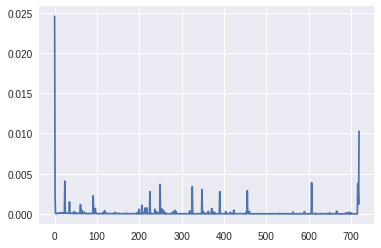

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

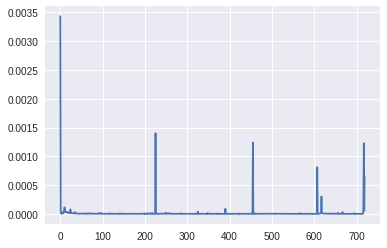

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

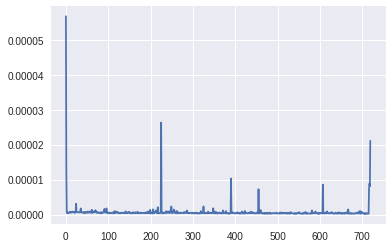

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

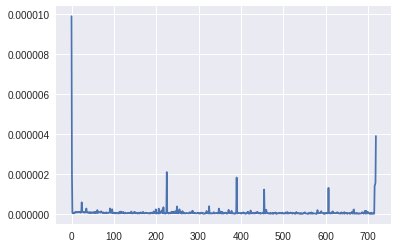

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

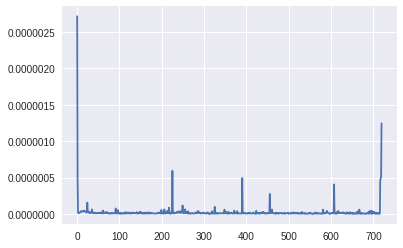

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

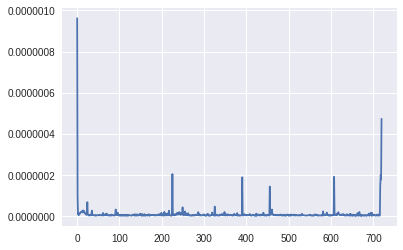

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

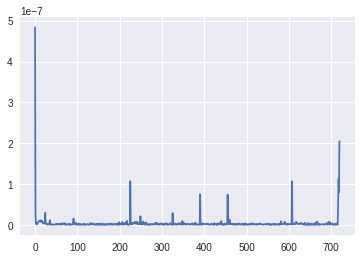

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

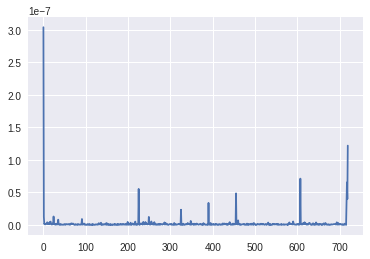

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

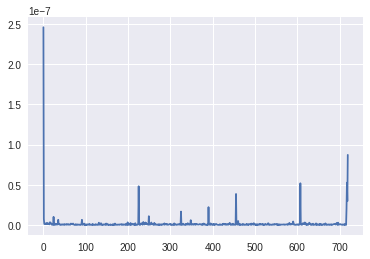

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

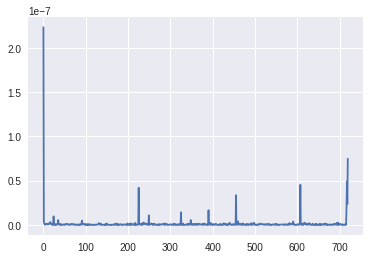

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

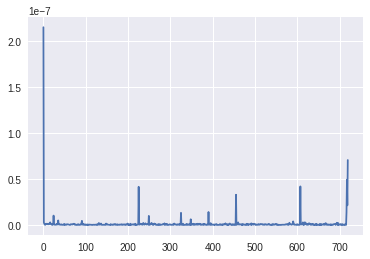

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

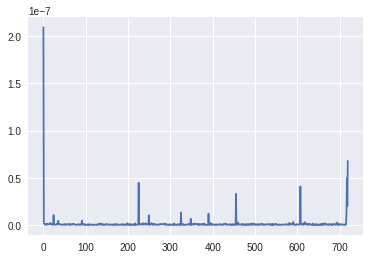

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

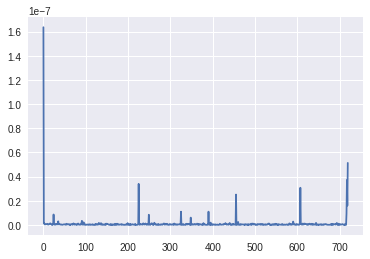

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

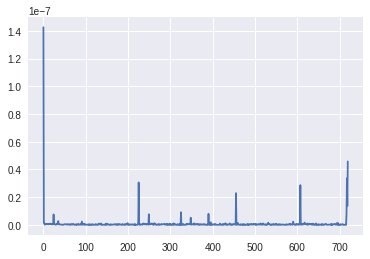

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

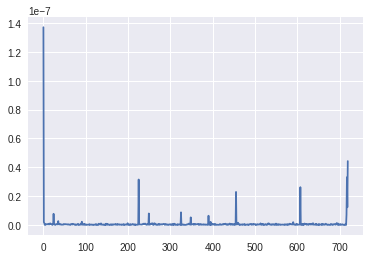

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

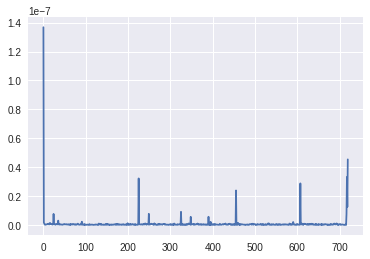

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

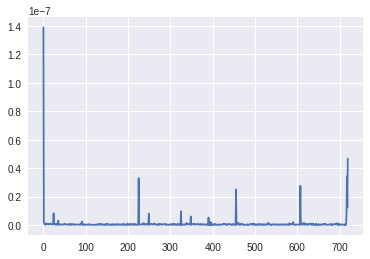

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

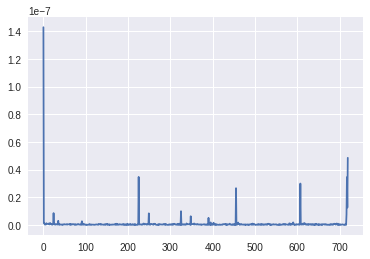

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

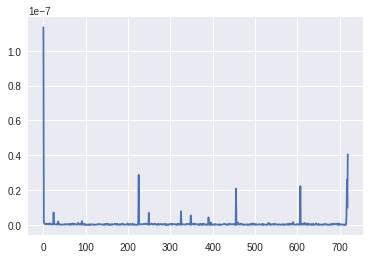

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

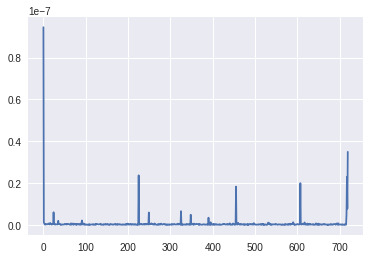

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

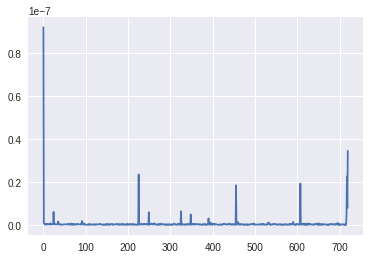

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

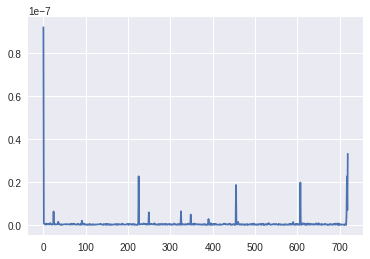

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

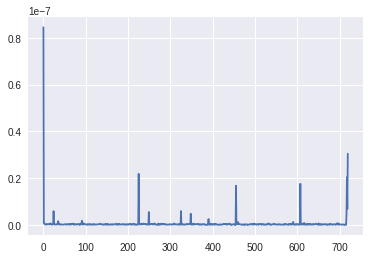

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

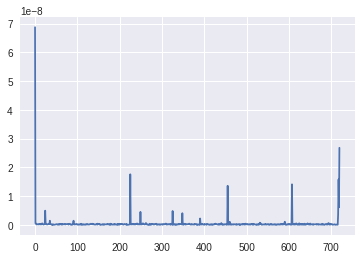

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

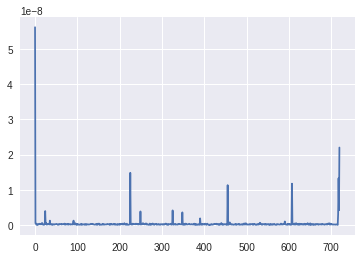

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

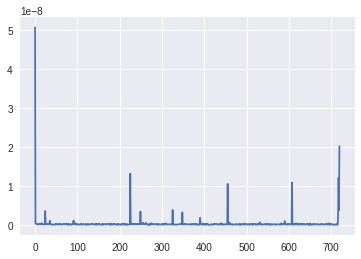

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

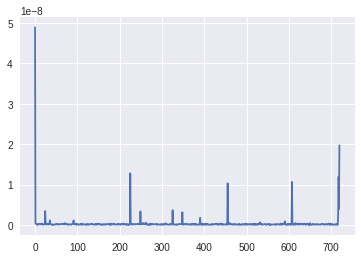

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

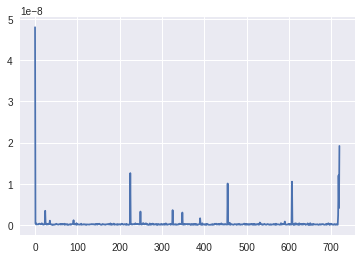

[[1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
[[31]]
[[31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
[[56]]
[[56], [56], [56], [56], [56], [56], [56], [56], [56], [56], [56],

KeyboardInterrupt: ignored

In [0]:
for epoch in range(5000):
  history = train(debug=True)
  
  if epoch % 5 == 0:
    plt.plot(history)
    plt.show()
    print(sample('T'))
    print(sample('m'))
    print(sample('O'))
    torch.save(model, './my_drive/LM1/model.pt')

In [0]:
def show_hist():
  all_good = []
  all_bad = []
  for i in range(720):
    good = data[i].transpose(0, 1)[0].view(chunk_size, 1)
    bad = torch.LongTensor(chunk_size, 1).random_(0, ntoken).to(device)
    all_good.append(evaluate(good))
    all_bad.append(evaluate(bad))

  all_good = np.array(all_good)
  all_bad = np.array(all_bad)
  
  good_norm = all_good.mean()
  bad_norm = all_bad.mean()

  good = all_good / good_norm
  bad = all_bad / bad_norm

  print("good: ", good_norm)
  print("bad: ", bad_norm)
  
  g = sns.FacetGrid(attend, col="subject", col_wrap=1, height=2)
  
  sns.distplot(bad, label="bad")
  sns.distplot(good, label="good")
  plt.legend()
  plt.show()

In [0]:
for i in range(2):
  show_hist()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters().
  if sys.path[0] == '':


good:  -1568140547.25
bad:  -912133705.0


NameError: ignored

In [0]:
def evaluate(q):
  model.eval()
  hidden = model.init_hidden(1)
  total_loss = .0
  
  with torch.no_grad():
    output, hidden = model(q, hidden)
    output_flat = output.contiguous().view(-1, ntoken)
    target = q.contiguous().view(-1)
    total_loss += len(data) * criterion(output_flat, target).item()
  
  return total_loss

In [0]:
all_good = []
all_bad = []
for i in range(720):
  good = data[i].transpose(0, 1)[0].view(chunk_size, 1)
  bad = torch.LongTensor(chunk_size, 1).random_(0, ntoken).to(device)
  all_good.append(evaluate(good))
  all_bad.append(evaluate(bad))
  
all_good = np.array(all_good)
all_bad = np.array(all_bad)

In [0]:
print(evaluate(torch.tensor([7] * 70).to(device).view(70, 1)))
print(to_alpha[2])

-193929817.5
h


In [0]:
good_norm = all_good.mean()
bad_norm = all_bad.mean()

good = all_good / good_norm
bad = all_bad / bad_norm

print("good: ", good_norm)
print("bad: ", bad_norm)

good:  -1568140547.25
bad:  -908830605.8125


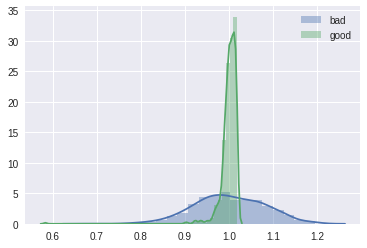

In [0]:
sns.distplot(bad, label="bad")
sns.distplot(good, label="good")
plt.legend()

In [0]:
def pretty(ugly):
  res = ''
  for c in ugly:
    res += to_alpha(c)
  
  return res

In [0]:
def sample(now, debug=False):
  now = [[from_alpha[q]] for q in now]
  print(now)
  model.eval()
  hidden = model.init_hidden(1)
  
  with torch.no_grad():
    for i in range(70 - len(now)):
      output, hidden = model(torch.tensor(now).type(torch.LongTensor).to(device), hidden)
      output = output[-1].squeeze()
      now.append([torch.argmax(output).data.cpu().numpy().item()])
      
  res = ''
  print(now)
    
  for c in now:
    res += to_alpha[c[0]]
  
  return res

In [0]:
sample('From')

[[57], [6], [7], [31]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters().
  if sys.path[0] == '':


[[57], [6], [7], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31], [31]]


'Frommmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm'

In [0]:
x = data[0]
x.transpose_(0, 1)
print(x)

pretty(x[0])